# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

As always we start up by importing the data into dataframe and displaying some records of given dataset.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, delimiter=',', names=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalanity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'])

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Next we will define explanatory variables and target variable. Principal Component Analysis is affected by scale of the variables though, so we need to transform our data such that its distribution will have mean equal to 0 and standard deviation equal of 1. We will use `StandardScaler()` method for this purpose.

In [3]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X = StandardScaler().fit_transform(X)

Now we can create an instance of the model with the number of principal components equal to the number of explanatory variables. In the following step we will fit PCA model with the features and apply dimensionality reduction on them. It is worth noting that if we had training and test dataset, we would fit PCA on training set only and then apply transform to both training and test sets. Finally we will create a new dataframe with principal components.

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pc = pca.fit_transform(X)
principal_df = pd.DataFrame(data=pc, columns=['PC' + str(i) for i in range(1, 14)])
principal_df = pd.concat([principal_df, df[['Class']]], axis=1)

The explained variance tells us how much information is gathered in each of the principal components. To see how much of the total information is contributed by some number of components we can plot the cumulative sum of the explained variance.

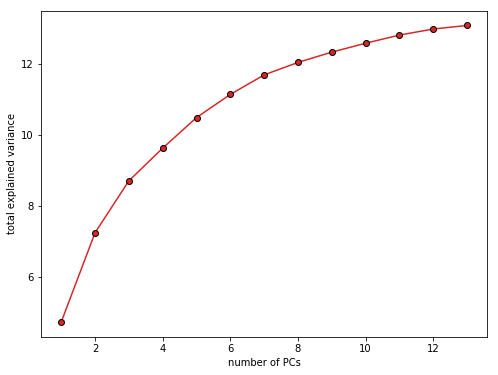

In [5]:
var_exp_cumsum = pca.explained_variance_.cumsum().round(2)

fig = plt.figure(figsize=(8, 6))
plt.plot(range(1, 14), var_exp_cumsum, marker='o', color='tab:red', markeredgecolor='black')
plt.xlabel('number of PCs')
plt.ylabel('total explained variance')
plt.show()

From the plot above we can observe that first 3 principal components contain around 70% of the variance. The following section plots the points in two-dimensional principal components space.

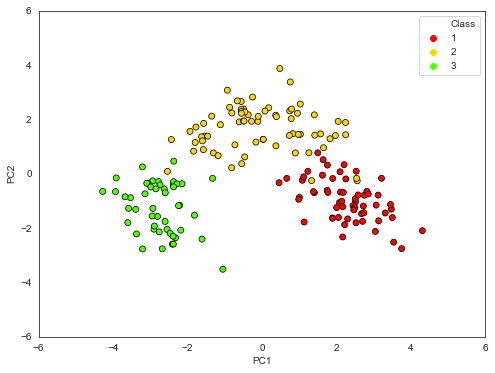

In [6]:
fig = plt.figure(figsize=(8, 6))
sns.set_style('white')
sns.scatterplot(data=principal_df, 
                x='PC1', 
                y='PC2', 
                hue='Class', 
                palette='prism', 
                legend='full', 
                edgecolor='black').set(xlim=(-6, 6), ylim=(-6, 6))
plt.show()

The samples lies along PC1 and PC2. They can be grouped into clusters and it's possible to distinguish classes so potentially we could perform further analysis on every group. Let's check out what will happen when we plot the points in PC2 and PC3 space.

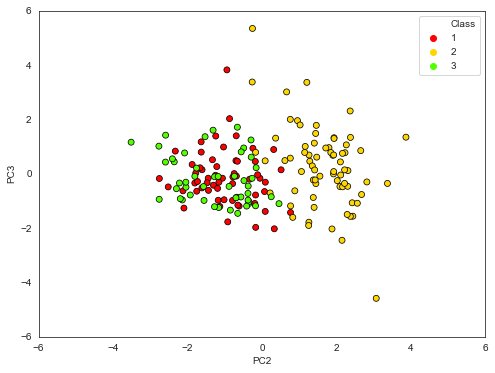

In [7]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, 
                x='PC2', 
                y='PC3', 
                hue='Class', 
                palette='prism', 
                legend='full', 
                edgecolor='black').set(xlim=(-6, 6), ylim=(-6, 6))
plt.show()

Now it's much harder to distinguish the classes since PC3 contains less information than PC1.